# Worksheet 2

### This is the second set of exercises for the Open Quantum Systems course. As before, there are both analytical and numerical components to the exercises. Each of the 8 questions below is worth 10 marks. 

---

In [43]:
# imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
import scipy.stats as stats
import random as rand

1. Hamiltonian dynamics for mixed states (in the Schrödinger picture) is described by the von Neumann equation 

$$\frac{{\rm d}\hat{\rho}}{{\rm d}t} = \frac{1}{{\rm i}\hbar}[\hat{H},\hat{\rho}].$$

Suppose that the Hamiltonian comprises a sum of two terms, $\hat{H} = \hat{H}_0 + \hat{H}_1$. The density matrix in the interaction picture generated by $\hat{H}_0$ is defined by

$$ \hat{\rho}_I(t) = \hat{U}^\dagger_0(t,t_0) \hat{\rho}(t) \hat{U}_0(t,t_0),$$

where $\hat{U}_0(t,t_0) = {\rm e}^{-{\rm i}\hat{H}_0 (t-t_0)/\hbar}$, $\hat{\rho}(t)$ is the density matrix in the Schrödinger picture, and $t_0$ is an (arbitrary) initial time. Show that the state in the interaction picture obeys a differential equation of the form

$$ \frac{{\rm d}\hat{\rho}_I}{{\rm d}t} = \frac{1}{{\rm i}\hbar} [\hat{H}_I(t), \hat{\rho}_I(t)],$$

and give an explicit expression for the interaction-picture Hamiltonian $\hat{H}_I(t)$. What is the general solution of this equation in terms of the initial condition $\hat{\rho}(t_0)$?

2. A thermal equilibrium state is a mixed state with two key properties: <br>
    (i) it is stationary (unchanging) under Hamiltonian dynamics and <br>
    (ii) the probability $p_i$ of finding the system with energy $E_i$ is given by the Boltzmann distribution of statistical mechanics, i.e. $p_i = {\rm e}^{-\beta E_i}/Z$, where $\beta = 1/k_BT$ is the inverse temperature and $Z = \sum_i {\rm e}^{-\beta E_i}$ is the partition function.<br>
    
    In quantum mechanics, the thermal state of a system whose dynamics are governed by the Hamiltonian $\hat{H}$ is given by
    
    $$\hat{\rho}_\beta = \frac{{\rm e}^{-\beta \hat{H}}}{Z}, $$
    
    where $Z = {\rm tr}[{\rm e}^{-\beta \hat{H}}]$.
    
    (a) Show that this state obeys both properties (i) and (ii).    
    
    (b) For a qubit with Hamiltonian $\hat{H} = \tfrac{1}{2}\hbar\omega \hat{\sigma}_z$, show that
    
    $$ \hat{\rho}_\beta = \frac{1}{2}\left[\hat{\mathbb{1}} - \tanh(\beta\hbar\omega/2) \hat{\sigma}_z\right].$$
    
    (Hint: take a look at Exercise 1(a), Worksheet 1)
    
    (c) Find analytical expressions for the expectation values of the three Pauli matrices in the above thermal equilibrium state. Plot the thermal expectation value of $\langle \hat{\sigma}_z\rangle$ as a function of dimensionless temperature, $k_B T/\hbar\omega$.

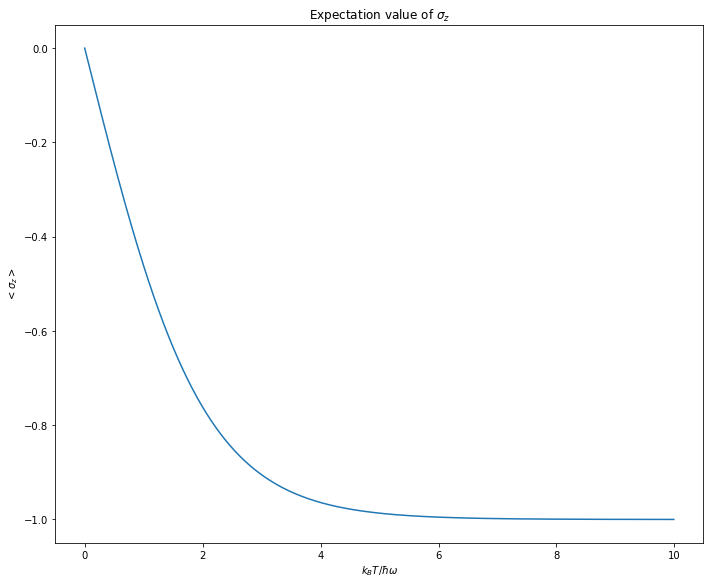

In [44]:
kThw = np.arange(0, 10, 0.01)

fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.plot(kThw, -np.tanh(kThw/2))
ax.set_xlabel('$ k_BT / \hbar \omega$')
ax.set_ylabel('$< \sigma_z >$')
ax.set_title('Expectation value of $\sigma_z$')
plt.show()

3. The following function samples a "biased coin", which gives the result 0 (heads) with probability p and gives the result 1 (tails) with probability 1-p. Play around with it and try to understand how it works.

In [45]:
from random import random
def biased_coin(p):
    r = random()
    if r<p:
        return 0
    else:
        return 1

(a) Plot a histogram of 200 realisations of the output of biased_coin() for p=0.3. (Hint: check out the [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function).

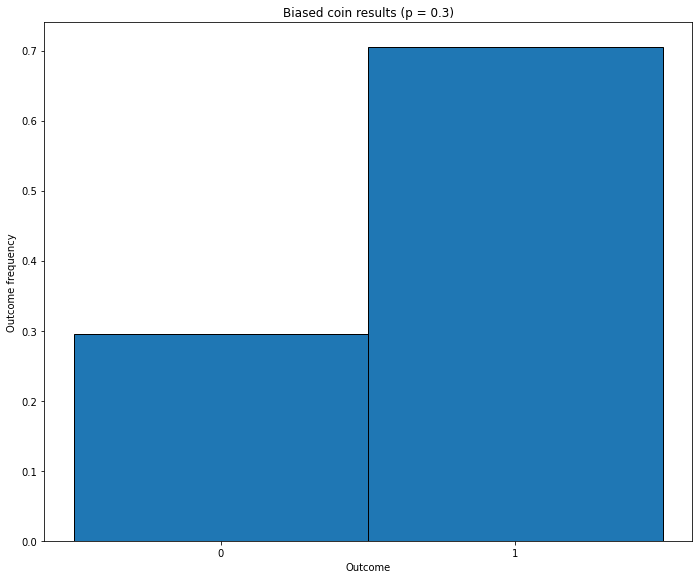

In [46]:

# Define the probability p and number of iterations n
p = 0.3
n = 200

# Store the results in an array using a list comprehension
results = np.array([biased_coin(p) for i in range(n)])

# Plot the results
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.hist(results,bins=[-0.5, 0.5, 1.5], density=True, ec='black')
ax.set_xticks([0,1])
ax.set_xlabel('Outcome')
ax.set_ylabel('Outcome frequency')
ax.set_title(f'Biased coin results (p = {p})')
plt.show()

(b) Write an analogous function that samples a "three-sided coin", which yields the result 0 with probability $p_0$, 1 with probability $p_1$, and 2 with probability $1-p_0-p_1$. Plot a histogram of 200 samples of the output  for $p_0=0.2$ and $p_1 = 0.5$.

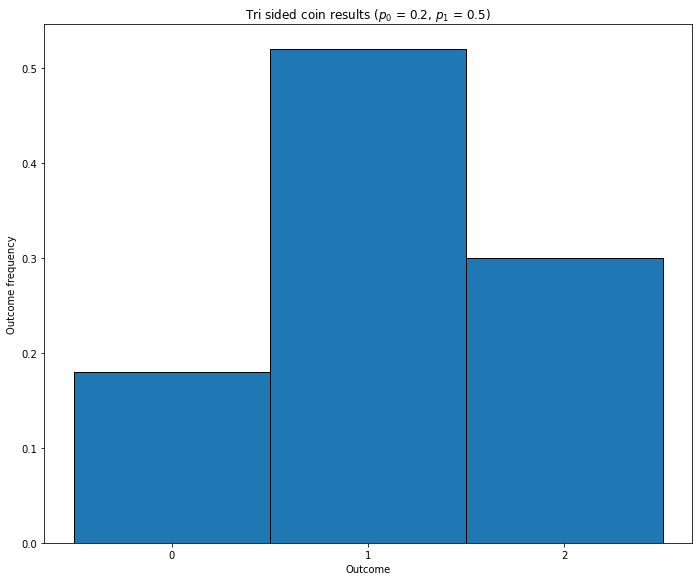

In [47]:
# Simulate a three sided coin
def tri_coin(p0, p1):
    r = random()
    if r<p0:
        return 0
    elif r>=p0 and r < p1+p0:
        return 1
    else:
        return 2
# Set probabilities, where pi is the probability of obtaining outcome i    
p0 = 0.2
p1 = 0.5
# n defines number of iterations, and ps represents the number of sides on the coin
# i.e. the number of possible outcomes
n = 200
sides = 3
# Set the bin ranges and x_tick locations for plotting
bins = [-0.5+i for i in range(0,sides+1)]
x_ticks = [i for i in range(sides)]

# Store the results in an array using a list comprehension
results = np.array([tri_coin(p0,p1) for i in range(n)])

# Plot the results
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.hist(results, bins=bins, density=True, ec='black')
ax.set_xticks(x_ticks)
ax.set_xlabel('Outcome')
ax.set_ylabel('Outcome frequency')
ax.set_title(f'Tri sided coin results ($p_0$ = {p0}, $p_1$ = {p1})')
plt.show()

(c) Generalise the function to an "$N$-sided coin", which yields the result $i \in \{0,1,2,\ldots,N-1\}$ with probability $p_i$. Provide a histogram demonstrating that the function works as expected.

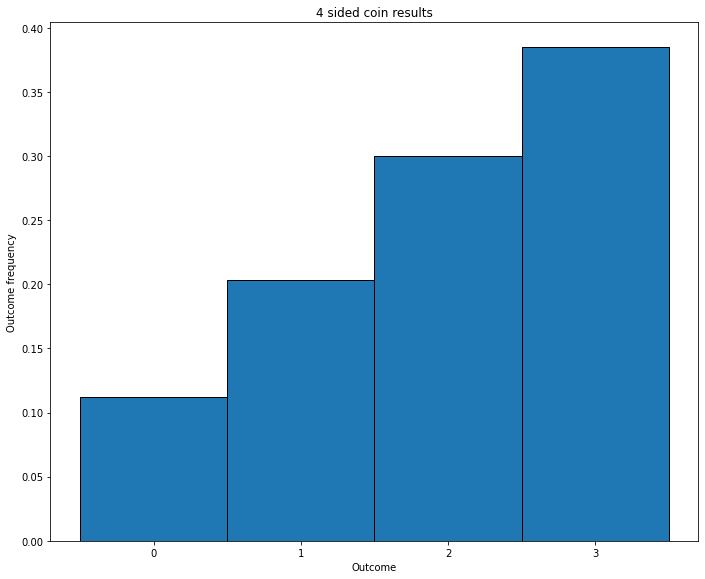

In [48]:
# Return an integer from 0 to n-1, according to the probabilities defined in p_list
# This should be a list of probabilities in which the value at index i represents the
# probability of the outcome i
def n_sided_coin(p_list):
    r = random()
    result = 0
    prob_sum = 0
    if r < p_list[0]:
        return result
    prob_sum += p_list[0]
    result = 1
    
    for i in range(1, len(p_list)-1):
        if r >= prob_sum and r < (prob_sum + p_list[i]):
            return result
        prob_sum += p_list[i]
        result += 1
    return result

# Define some example probabilities
p_list = [0.1, 0.2, 0.3, 0.4]
#Number of iterations n 
n = 1000
sides = len(p_list)

# Set the bin ranges and x_tick locations for plotting
bins = [-0.5+i for i in range(0,sides+1)]
x_ticks = [i for i in range(sides)]

# Store the results in an array using a list comprehension
results = np.array([n_sided_coin(p_list) for i in range(n)])

# Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.hist(results, bins=bins, density=True, ec='black')
ax.set_xticks(x_ticks)
ax.set_xlabel('Outcome')
ax.set_ylabel('Outcome frequency')
ax.set_title(f'{sides} sided coin results')
plt.show()

(d) Can you generalise this to sample from a continuous probability distribution? Write a function that outputs a random number $x$ in the interval $x\in [0,1]$ according to the probability density $$ p(x) = \frac{\pi}{2} \sin(\pi x).$$ Demonstrate your function with a histogram.

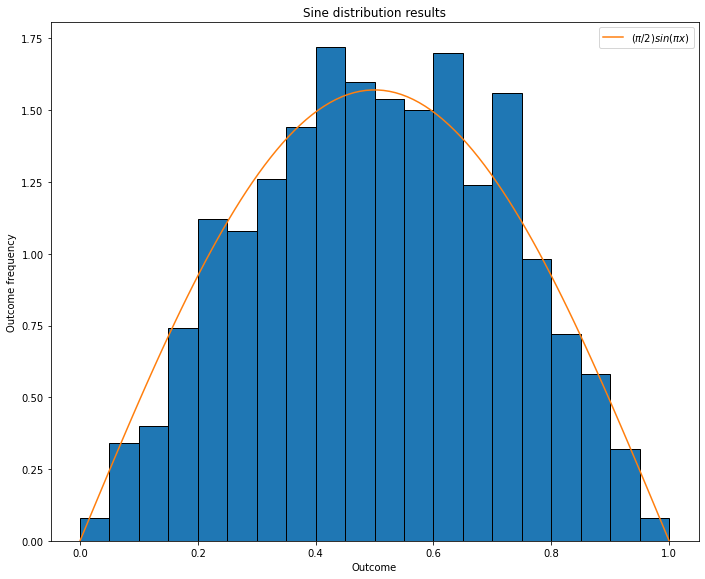

In [49]:
# Return a number between 0 and 1 selected randomly according to a sine distribution 
def random_number(n):
    
    # arr is an array of n possible values between 0 and 1 that the function can return 
    arr = np.linspace(0, 1, n)
    
    # Define the sin of each value in arr. The sum of the normalized values up to index i will 
    # then represents the probability of the value at index i or arr occurring
    sin = (np.pi/2)*np.sin(np.pi*arr)
    sin = sin/np.sum(sin)
    # Select a random number between 0 and 1
    r = rand.uniform(0,1)
    
    # Define a variable to store a cumulutive sum of the values in the sin array (the probabilitites)
    prob_sum = 0
    if r < sin[0]:
        return arr[0]
    prob_sum += sin[0]
    
    for i in range(1, len(sin)-1):
        if r >= prob_sum and r < (prob_sum + sin[i]):
            return arr[i]
        prob_sum += sin[i]
    # If no previous value is returned, then return the last value in arr
    return arr[-1]

# Number of iterations (or samples) to do
iters = 1000
# This n defines the number of segments that the probability density will be split into
n = 100

# Set the bin ranges and x_tick locations for plotting
bins = np.arange(0, 1+0.05, 0.05)
x_ticks = np.arange(0, 1+0.2, 0.2)

# Store the results in an array using a list comprehension
results = np.array([random_number(n) for i in range(iters)])
# Array for plotting
x = np.linspace(0, 1, 100)

# Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.hist(results, bins=bins, density=True, ec='black')
ax.plot(x, (np.pi/2)*np.sin(np.pi*x), label='$(\pi /2) sin(\pi x)$')
ax.set_xticks(x_ticks)
ax.set_xlabel('Outcome')
ax.set_ylabel('Outcome frequency')
ax.set_title('Sine distribution results')
ax.legend()
plt.show()


4. In this exercise we will compare the thermal state of a qubit
$$ \hat{\rho}_\beta = \frac{{\rm e}^{-\beta\hbar\omega\hat{\sigma}_z/2}}{Z},$$
to the pure state
$$|\psi_\beta\rangle = \frac{1}{\sqrt{Z}}\left({\rm e}^{-\beta\hbar\omega/4}|0\rangle + {\rm e}^{\beta\hbar\omega/4}|1\rangle\right), $$
where $Z = {\rm tr}({\rm e}^{-\beta\hbar\omega\hat{\sigma}_z/2})$.

    (a) Write down general expressions for the density matrices corresponding to both of the above states.

    (b) Consider a projective measurement of the observable $\hat{\sigma}_z$. Give the probabilities of the two measurement outcomes for the thermal state $\hat{\rho}_\beta$. Give the analogous measurement outcome probabilities for the pure state $|\psi_\beta\rangle$. Write down the expectation value $\langle \hat{\sigma}_z\rangle$ for both states. Comment briefly on the results.  
    
    **First consider the behaviour of the function $tanh(T)$, where $T$ is temperature. This will appraoch zero for $T \to 0$ and will essentially be 1 otherwise. For the state $\hat{\rho}_\beta$ we can see that the probability of the system being in the state $|0 \rangle$ (obtaining a measurement outcome of 1) is essentially zero, and the system is permanantly in the $|1 \rangle$ state ( the probability of obtaining a measurement outcome of -1 is 1) for all reasonable temeratures. This also means that as the temperature approaches absolute zero the system will be in a 50:50 superposition of the $|0 \rangle$ and $|1 \rangle$ states.    
      A similar but opposite situation exists for the state $\hat{\rho}_\psi$. For temperatures appraching absolute zero the system is exclusivly in the $|1 \rangle$ state. For increasing temperatures the system appraoches a 50:50 superposition of the $|0 \rangle$ and $|1 \rangle$ states. These findings are mirrored in the expectation values which are -1 (corresponding to the for both $|1 \rangle$ state) except for temperatures approaching absolute zero, in which case it will be 0, corresponding to the superposition state.**

    (c) Now consider a projective measurement of the observable $\hat{\sigma}_x$. Give the measurement outcome probabilities for the two different states $\hat{\rho}_\beta$ and $|\psi_\beta\rangle$. Write down the expectation value $\langle \hat{\sigma}_x\rangle$ for both states. Comment briefly on the results.  
    **For the $\hat{\rho}_\beta$ state we see that both probabilities are $\frac{1}{2}$ corresponding to an equal superposition of the $|+ \rangle$ and $|- \rangle$ states. This is mirrored in the expectation value of 0 for this case. For the $|\psi_\beta\rangle$ state the probabilities have a $cosh(\frac{1}{T})$ dependence. The result is that for normal temperatures the system remains solely in the $|+ \rangle$ state, with $P(1) =0$ and $P(0) = 0$. Again we see the superposition state appearing only for temperatures near absolute zero. Once again this is captured in the expectation value, which also depends on $cosh(\frac{1}{T})$. For normal temperatures $\hat{\sigma}_x$ appraches a value of 1, and goes to 0 as temperature goes to 0, indicating the superposition state.**

    (d) Repeat the calculations for a projective measurement of $\hat{\sigma}_y$ and briefly comment on the result.  
    **For the projective measurement $\hat{\sigma}_y$, all probabilities for both systems in $\frac{1}{2}$. This indicates that in both cases, the system is in a 50:50 superposition state of the $\hat{\sigma}_y$ eigenvectors, namely the $|+_y \rangle$ and $|-_y \rangle$ states. This is also shown in the expectation values, which in both cases are 0. These results show that only the projective measurement of $\hat{\sigma}_y$ are temperature independent in both systems.**

5. Consider the following simple decoherence model for a qubit. The Hamiltonian is 
    $$ \hat{H} = \frac{\hbar\omega}{2} \hat{\sigma}_z,$$
    where $\omega$ is a random variable that takes the values $\omega \in \{+\omega_0,-\omega_0\}$ with equal probabilities $p_+ = p_- = \tfrac{1}{2}$.

    (a) Write down an analytical expression for the time-dependent density matrix describing the ensemble, starting from the initial condition $\hat{\rho}(0) = |+\rangle\langle +|$.
    
    (b) The purity $P$ is defined by $P={\rm tr} \hat{\rho}^2$. It is a real number that varies between $P=1$ for a pure state and $P = 1/2$ for a maximally mixed state of a qubit. (More generally, $P$ varies between $1$ and $1/d$ for a system with Hilbert-space dimension $d$.) Plot the purity of the qubit density matrix as a function of time in the interval $\omega_0 t = [0,10]$. Comment briefly on what happens at $t = \pi/2\omega_0 $, $t = \pi/\omega_0 $, and $t=2\pi/\omega_0$.

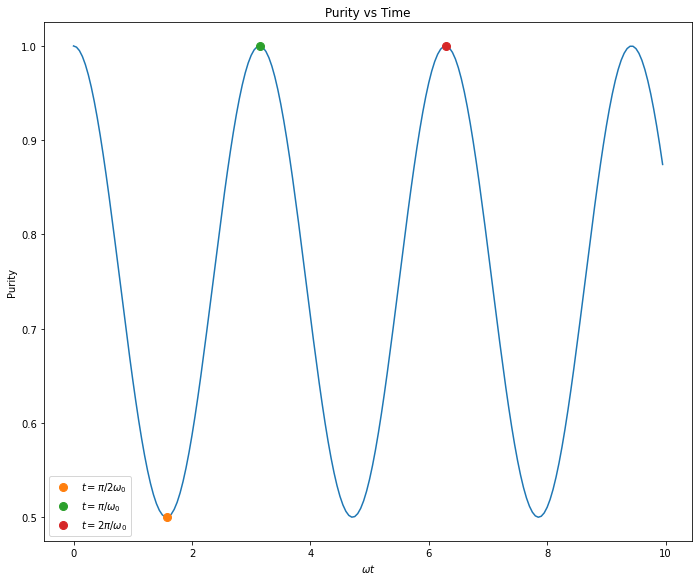

In [50]:
# Function to return the purity of the state based on the 
# analytical expression for the purity calculated in part a)
def purity(wt):
    # Define |+> and |-> states
    plus = np.sqrt(1/2)*np.array([[1],[1]])
    minus = np.sqrt(1/2)*np.array([[1],[-1]])
    # Define outer product of |+> and |-> states
    outer_p = plus@plus.T
    outer_m = minus@minus.T
    
    # Define an array to store the purity values at each time wt
    purity_list = np.zeros(len(wt))
    
    for i in range(len(wt)):
        # Calculate rho and its corresponding purity at each time wt
        rho = (np.cos(wt[i]/2)**2)*outer_p + (np.sin(wt[i]/2)**2)*outer_m
        purity_list[i] = np.trace(rho@rho)
        
    return purity_list

# Define an array of time steps
wt = np.arange(0, 10, 0.05)
# Store the 3 times specified in the question for plotting
ts = [np.pi/2, np.pi, 2*np.pi]
# Set initial state

P = purity(wt)

# Plot the results
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.plot(wt, P)
ax.plot(ts[0], 0.5, 'o', markersize=8, label='$t = \pi / 2\omega_0$')
ax.plot(ts[1], 1, 'o', markersize=8, label='$t = \pi / \omega_0$')
ax.plot(ts[2], 1, 'o', markersize=8, label='$t = 2\pi / \omega_0$')
ax.set_xlabel('$\omega  t$')
ax.set_ylabel('Purity')
ax.set_title('Purity vs Time')
ax.legend()
plt.show()

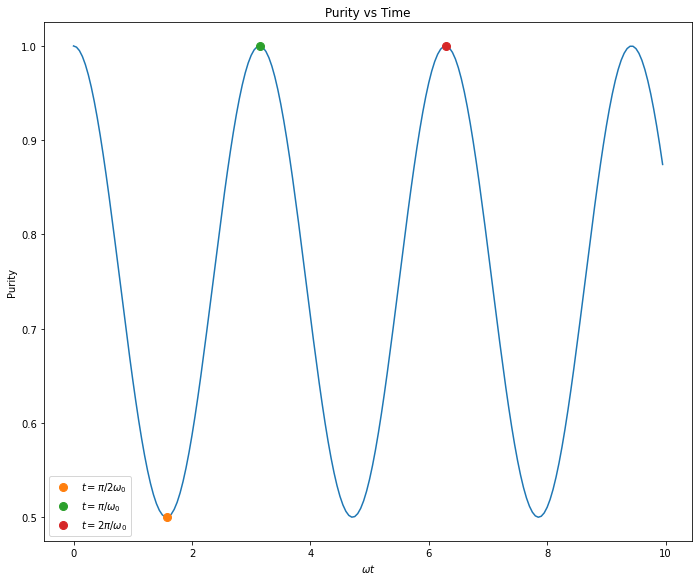

In [51]:
######################################################################################################
# Extra calculation using the analytical expression for trace(rho**2). This verifies the above results
######################################################################################################
# Function to return th purity of the state based on the 
# analytical expression for the purity calculated in part a)
def purity(wt):
    return (np.cos(wt/2))**4 + (np.sin(wt/2))**4

# Define an array of time steps
wt = np.arange(0, 10, 0.05)
# Store the 3 times specified in the question for plotting
ts = [np.pi/2, np.pi, 2*np.pi]
# Set initial state


P = purity(wt)

# Plot the results
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.plot(wt, P)
ax.plot(ts[0], purity(ts[0]), 'o', markersize=8, label='$t = \pi / 2\omega_0$')
ax.plot(ts[1], purity(ts[1]), 'o', markersize=8, label='$t = \pi / \omega_0$')
ax.plot(ts[2], purity(ts[2]), 'o', markersize=8, label='$t = 2\pi / \omega_0$')
ax.set_xlabel('$\omega  t$')
ax.set_ylabel('Purity')
ax.set_title('Purity vs Time')
ax.legend()
plt.show()

6. Now consider a qubit decoherence model, $\hat{H} = \hbar\omega\hat{\sigma}_z/2$, where the qubit transition frequency is a Gaussian random variable specified by the expectations
$$ \mathbb{E}[\omega] = \omega_0,\qquad \mathbb{E}[(\omega-\omega_0)^2] = g^2.$$

(a) Consider the evolution starting from the initial state $\hat{\rho}(0) = |+\rangle\langle +|$. Simulate $M=20$ random realisations of the qubit dynamics up to a time $\omega_0 t = 30$, with $g = 0.1\omega_0$. Plot the expectation value $\langle \hat{\sigma}_x\rangle$ as a function of time for each realisation (put them all on one plot). 

In [52]:
# Define some global constants for the problem

# The Pauli matrices
PX = np.array([[0,1],[1,0]])
PY = np.array([[0,-1j],[1j,0]])
PZ = np.array([[1,0],[0,-1]])

# The Pauli vector
SIG = [PX, PY, PZ]

# Mean and variance of the distribution
W_0 = 1
G = 0.1*W_0


In [53]:
#######################################################################################################
#                                        SOLUTION 1
# The solution in the following two cells assumes that a single w is chosen from the above distribution 
# for each iteration and we are aware of its value before the time evolution begins. The system in each
# iteration then evolves according to the single value of w chosen for that iteration
# Note: This is the assumption under which part b) is calculated
#######################################################################################################

# Define some functions to facilitate the computatuion

# Return a value for w, selected from a normal probability distribution with 
# a specified mean and standard deviation
def generate_w(mean = W_0, std_dev = G):
    # Define array of w's within 3 standard deviations of the mean
    w_list = np.linspace(mean-3*std_dev, mean+3*std_dev, 100)
    # Set a normal probability distribution with this mean and std_dev
    pdf = stats.norm.pdf(w_list, mean, std_dev)
    # Normalise the distribution
    pdf = pdf/np.sum(pdf)
    
    
    # Random number between 0 and 1
    r = rand.uniform(0,1)
    
    prob_sum = 0
    if r < pdf[0]:
        return w_list[0]
    prob_sum += pdf[0]
    
    for i in range(1, len(w_list)-1):
        if r >= prob_sum and r < (prob_sum + pdf[i]):
            return w_list[i]
        prob_sum += pdf[i]
        
    return w_list[-1]


    
# Define a function for iteratively carrying out unitary time evolution M times on
# initial density matrix matrix rho_0. Each evolution will have a different Hamiltonian 
# according to some w generated from the function generate_w. Each evolution will have 
# total evolution time t_tot, timestep dt and will comuputewith and return the expectation
# values at each time step for each observable in the list obs 
def time_evo(rho_0, M, t_tot, dt, obs):
    
 
    # Initialise variables
    n_steps = int(t_tot/dt)  # Number of timesteps to take
    n_obs = len(obs)         # Number of observables to compute at each timestep
    rho, t = rho_0, 0.0           # Initial state and time
    time = np.arange(t, t_tot+dt, dt)
    obs_exp = np.zeros([n_obs,n_steps+1])
    exp_vals = []
    
    
    for m in range(M):
        # Get a random w value according to distribution
        w = generate_w()
        # Define evolution operator U
        U = expm((-1j*w*dt/2)*PZ)
        # Loop over timesteps
        for i in range(n_steps):
            # Compute and store expectation values
            for j in range(n_obs):
                exp_val = np.trace(obs[j]@rho)
                obs_exp[j,i] = np.real(exp_val)

            # Take a step forward in time
            rho = U@rho@U.T.conjugate()

    
        # Compute and store final expectation values
        for j in range(n_obs):
            exp_val = np.trace(obs[j]@rho)
            obs_exp[j,n_steps] = np.real(exp_val)
        exp_vals.append(obs_exp.copy())

    
    return time, exp_vals

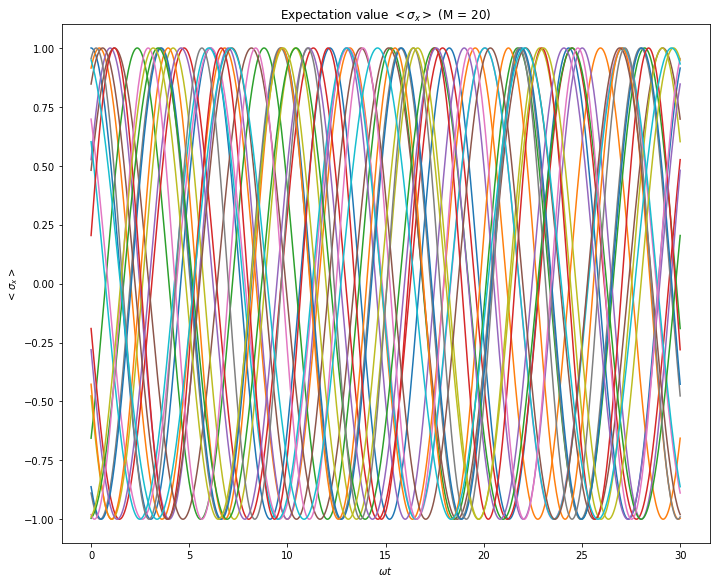

In [54]:
# Define the initaial |+> state
plus = np.sqrt(1/2)*np.array([[1],[1]])
    
# Define total time and time increment size
t_tot = 30
dt = 0.05

# Define number of iterations
M = 20

# Initial density matrix
rho_0 = plus@(plus.T)

# Define a list of the observables to be calculated
obs = [PX]

# Run the time evolution and store the array of time steps and expectation values
time, X_exp = time_evo(rho_0, M, t_tot, dt, obs)


# Plot the results
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])

for m in range(M):
    ax.plot(time, X_exp[m][0])

ax.set_xlabel('$\omega t$')
ax.set_ylabel('$<\sigma_x>$')
ax.set_title(f'Expectation value $<\sigma_x>$ (M = {M})')
plt.show()


In [55]:
#######################################################################################################
#                                        SOLUTION 2
# The following two cells are based on the assumption that some w is chosen from the above distribution 
# at each iteration unknown to us and then each iteration evolves according to its chosen w. The key 
# difference here is that there is uncertainty surrounding which value of w each iteration is evolving
# according to, where as in solution 1 this is known in advance. As such, we must form a density matrix
# which is a probability weighted sum of all possible choices of w.
# NOTE: There is no solution to part b) based on this assumption, but rather this should mimic the 
# the limiting behaviour of solution 1 as M -> infinity
#######################################################################################################



# Define some functions to facilitate the computatuion

# Return a normal PDF for an array of values w_list with a specified mean and standard deviation
def generate_pdf(w_list, mean = W_0, std_dev = G):
    pdf = stats.norm.pdf(w_list, mean, std_dev)
    # Normalise the distribution
    return pdf/np.sum(pdf)


# Evolve a density matrix rho by a time dt according to the Hamiltonian H = w*u.dot(sig)
# Where the evolution occurs according to some w in w_list, with probability given
# by the corresponding entries in pdf. Return this evolved density matrix
def density_evo(rho, w_list, dt, pdf, u = [0, 0, 1], sig = SIG):
    
    # A variable to store the evolved density matrix
    new_rho = 0
    
    for i in range(len(w_list)):
        # Calculate the time evolution operator for each w_i value in ws array
        U = expm((-1j*w_list[i]*dt/2)*(u[0]*sig[0] + u[1]*sig[1] + u[2]*sig[2]))
        # Weigh each evolution by its probability (pdf[i]) of occuring
        new_rho += pdf[i]*U@rho@(U.T.conjugate())
    
    return new_rho
    
    
# Define a function for iteratively carrying out unitary time evolution, 
# with initial density matrix matrix rho_0, total evolution time t_tot, timestep dt, 
# obs a list of observables to be computed, summed over each Unitary evolution defined by each w in 
# the array w_list. 
# Return the time array and the array of expectation values for each observable in obs
def time_evo2(rho_0, w_list, t_tot, dt, obs):
    
 
    # Initialise variables
    n_steps = int(t_tot/dt)  # Number of timesteps to take
    n_obs = len(obs)         # Number of observables to compute at each timestep
    rho, t = rho_0, 0.0           # Initial state and time
    # Arrays to store the times steps and expectation values of each observable in 
    # obs at each timestep
    time = np.arange(t, t_tot+dt, dt)
    obs_exp = np.zeros([n_obs,n_steps+1])
    pdf = generate_pdf(w_list)

    # Loop over timesteps
    for i in range(n_steps):
        # Compute and store expectation values of each observable in obs
        for j in range(n_obs):
            exp_val = np.trace(obs[j]@rho)
            obs_exp[j,i] = np.real(exp_val)
        
        # Take a step forward in time by evovling the density matrix
        rho = density_evo(rho, w_list, dt, pdf)
     
    # Compute and store final expectation values
    for j in range(n_obs):
        exp_val = np.trace(obs[j]@rho)
        obs_exp[j,n_steps] = np.real(exp_val)
    
    
    return time, obs_exp
    

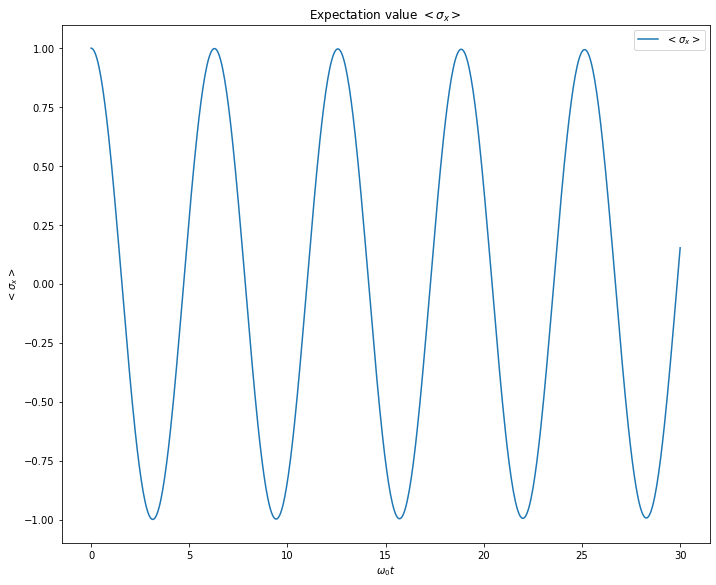

In [56]:
# Define the initial |+> state
plus = np.sqrt(1/2)*np.array([[1],[1]])
    
# Define total time and time increment size
t_tot = 30
dt = 0.05

# Initial density matrix
rho_0 = plus@(plus.T)
# Define array of omegas within 3 standard deviations of the mean
w_list = np.linspace(W_0-3*G, W_0+3*G, 100)
# Define a list of the observables to be calculated
obs2 = [PX]


# Run the time evolution and store the array of time steps and expectation values
time2, [X_exp2] = time_evo2(rho_0, w_list, t_tot, dt, obs)

# Plot the results
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.plot(time2, X_exp2, label = '$<\sigma_x>$')
ax.set_xlabel('$\omega_0  t$')
ax.set_ylabel('$<\sigma_x>$')
ax.set_title('Expectation value $<\sigma_x>$')
ax.legend()
plt.show()



(b) Plot the sample average of $\langle \hat{\sigma}_x\rangle$ from your simulated trajectories. The sample average is defined as
    $$\overline{\langle \hat{\sigma}_x\rangle}_{\rm samp} = \frac{1}{M} \sum_{m=1}^M \langle \hat{\sigma}_x\rangle_m,$$
    where $\langle \hat{\sigma}_x\rangle_m$ is the result for the $m^{\rm th}$ trajectory. How does this compare to what you expect for a very large number of trajectories $M\to\infty$?

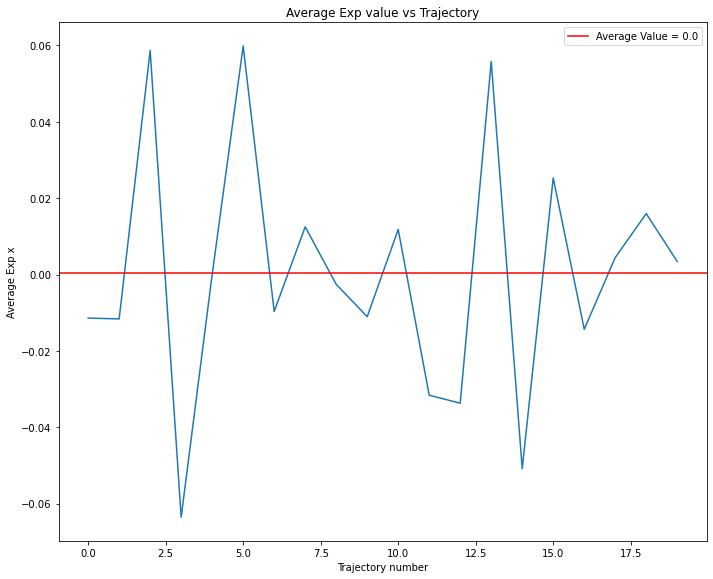

In [57]:
#######################################################################################################
# This solution is based on the results of the solution 1 above
#######################################################################################################

# Array to store the time average of each of the M runs
avg = np.zeros(M)
for m in range(M):
    avg[m] = np.average(X_exp[m][0])

# Define the sampel average of all M runs as defined above
sample_avg = (1/M)*np.sum(avg)

# Plot the results
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1, 0.1 ,0.9, 0.9])
ax.plot(range(M), avg)
ax.set_xlabel('Trajectory number')
ax.set_ylabel('Average Exp x')
ax.set_title('Average Exp value vs Trajectory')
ax.axhline(sample_avg, color='red', xmin=0, xmax=M,label=f'Average Value = {round(sample_avg, 3)}')
plt.legend()
plt.show()


**The results obtained in the above analysis agrees with what one would expect for $M \to \infty$. Indeed, for $\omega = \omega_0$ we would expect the initial state of $|+ \rangle \langle +|$ to oscillate sinusoidally between $|+ \rangle \langle +|$ and $|- \rangle \langle -|$, giving an expectation value of 0. In our case we have some $\omega$ which is not in general $ = \omega_0$, which will shift the distribution of the time evolution of the state. However, since this $\omega_0$ is chosen randomly from a normal distribution with mean $\omega_0$ it is expected that averaging over $M \to \infty$ samples would converge to the result given for $\omega = \omega_0$ (which is $\langle \sigma_x \rangle = 0$)**

7. The amplitude damping channel is a CPTP map for a qubit that describes the loss of energy, e.g. through spontaneous emission. The map is specified by the Kraus operators
$$ \hat{K}_0 = \sqrt{1-r} \hat{\sigma}_+\hat{\sigma}_- + \hat{\sigma}_-\hat{\sigma}_+,\qquad \hat{K}_1 = \sqrt{r}\hat{\sigma}_-,$$
where $\hat{\sigma}_\pm = \frac{1}{2}(\hat{\sigma}_x\pm{\rm i}\hat{\sigma}_y)$ are the usual qubit raising and lowering operators. 

    (a) Verify that the Kraus operators above constitute a CPTP map.
    
    (b) Starting from the superposition state $\hat{\rho} = |+\rangle\langle +|$, with $|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$, find the density matrix $\mathcal{E}(\hat{\rho})$ (e.g. numerically) and plot the expectation values of the three Pauli operators $\hat{\sigma}_{x,y,z}$ as a function of $r$.

In [58]:
# Define sigma plus and minus operators
sig_plus = np.array([[0,1], [0,0]])
sig_minus = np.array([[0,0], [1,0]])



# Generate a list of Krauss operators given in the question for a given value of r
def generate_ks(r):
    
    k_list = []
    k_list.append(np.sqrt(1-r)*(sig_plus@sig_minus) + sig_minus@sig_plus)
    k_list.append(np.sqrt(r)*sig_minus)
    
    return k_list

# Will apply all Krauss operators in k_list to the state rho and return the sum of each applicaion
def epsilon(rho, k_list):
    
    eps_rho = 0 
    
    for k in k_list:
        eps_rho += k@rho@k.T.conjugate()
        
    return eps_rho


# Return the expectation values for each observable in obs_list for each 
# value of r for a given initial density matrix rho_0
def calc_exp_vals(rho, r_list, obs_list = [PX, PY, PZ]):
    
    n_obs = len(obs_list)
    n_r = len(r_list)
    # Assign an array to store expectation values.
    # Each row is an observable and each entry in a row is the expectation 
    # value for a given r
    exp_vals = np.zeros([n_obs, n_r])
    
    # Loop over each value in r_list and get Krauss operators for that given r value
    for r_i in range(n_r):
        k_list = generate_ks(r_list[r_i])
        # Generate the result of the action of the Krauss operators on the state intitial state
        eps_rho = epsilon(rho, k_list)
        # Get the expectatio value of each observable in obs_list for this given value of r
        for obs_i in range(n_obs):
            exp_vals[obs_i, r_i] = np.real(np.trace(obs_list[obs_i]@eps_rho))
            
    return exp_vals


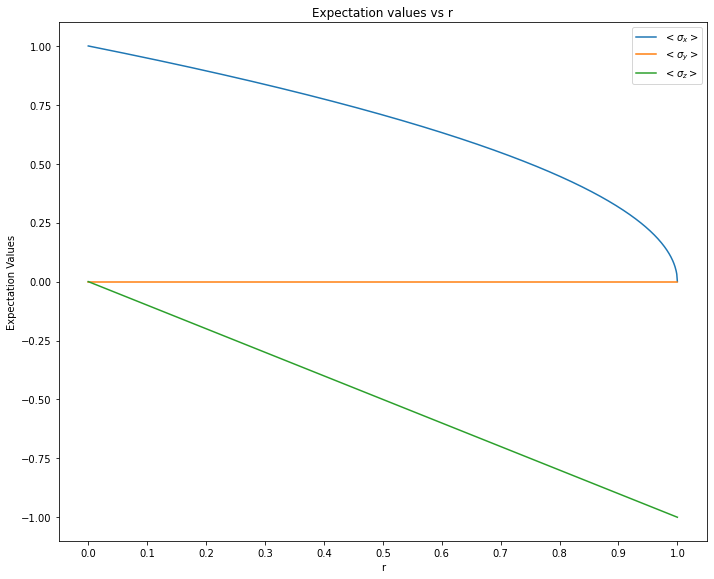

In [59]:
# Define the |+> state
plus = np.sqrt(1/2)*np.array([[1],[1]])
rho = plus@plus.T

# Set the r increment and array or r values
dr = 0.001
r_list = np.arange(0, 1+dr, dr)

# Unpack the expectation values for each observable
[exp_x, exp_y, exp_z] = calc_exp_vals(rho, r_list)


# Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.plot(r_list, exp_x, label = '$<\sigma_x>$')
ax.plot(r_list, exp_y, label = '$<\sigma_y>$')
ax.plot(r_list, exp_z, label = '$<\sigma_z>$')
ax.set_xlabel('r')
ax.set_ylabel('Expectation Values')
ax.set_title('Expectation values vs r')
ax.set_xticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.show()

(c) Now let us interpret the above Kraus operators as representing a generalised measurement with two outcomes. Write down analytical expressions for the probabilities of these two outcomes and the corresponding post-measurement states, assuming an arbitrary initial density matrix $\hat{\rho}$. Plot a histogram of the results that might be obtained from 200 such measurements on the state $\hat{\rho} = |+\rangle\langle +|$, assuming that $r=0.5$.

In [60]:
########################################################################################################
# The following solution assumes that each measurement is independent. That is, each measurement is made
# on 200 uniquely prepared |+><+| states, as opposed to the 200 measurements being made on the same 
# single state. If this were the case then the state would need to be evolved to a new post measurement
# after each measurement was made
########################################################################################################

# Returns a list of probabilities for obtaining each outcome m associated with each measurement
# operator M_m in M_list, given the system is in state rho
def meas_probs(rho, M_list):
    p_list = np.zeros(len(M_list))
    for i in range(len(M_list)):
        p_list[i] = np.trace(M_list[i].T.conjugate()@M_list[i]@rho)
        
    return p_list
    
# Returns the post measurement state of an initial state rho
# given that outcome m (associated with measurement operator M),
# is obtained upon performing a measurement on state rho
def post_measure_state(rho, M):
    rho_m = M@rho@M.T.conjugate()
    return rho_m/meas_prob(M)

# Simulate perfroming a measurement on the state according to the probabilities given in p_list
# Note that the order of the probabilities in p_list must be consistent with the order 
# of the outcome values of 0....n
def measure(p_list):

    # Random number between 0 and 1
    r = rand.random()
    # Variable to store the result to be returned
    result = 0
    # Store the cumulitive probability of each element in p_list
    prob_sum = 0
    if r < p_list[0]:
        return result
    prob_sum += p_list[0]
    result = 1
    
    for i in range(1, len(p_list)-1):
        if r >= prob_sum and r < (prob_sum + p_list[i]):
            return result
        prob_sum += p_list[i]
        result += 1
        
    return result

# Perform n independent measurements on the state rho, associated with the measurement 
# operators in the list M_list
def measurements(rho, M_list, n):
    
    # Get the probabilities of obtaining each measurement outcome m (each associated
    # with measurement operator M_m in M_list)
    p_list = meas_probs(rho, M_list)
    
    # Array to store each outcome
    outcomes = np.zeros(n)
    for i in range(n):
        # Perform a measurement on the state (according to p_list) and store the result
        outcomes[i] = measure(p_list)
        
    return outcomes
    

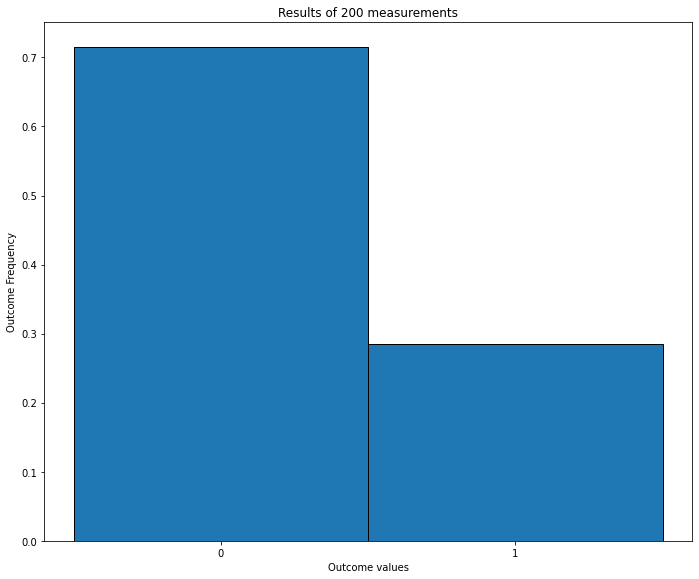

In [61]:
# Define density operator |+><+|
rho = plus@plus.T
# Set the value of r
r = 0.5
# n is the number of measurements that will be performed on the system
n = 200
# Define the list of measurement operators
M_list = generate_ks(r)

# Store the results of n measurements
outcomes = measurements(rho, M_list, n)

# Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
bins = [-0.5, 0.5, 1.5]
x_ticks = [0, 1]
ax.hist(outcomes, bins=bins, density=True, ec='black')
ax.set_xticks(x_ticks)
ax.set_title(f'Results of {n} measurements')
ax.set_xlabel('Outcome values')
ax.set_ylabel('Outcome Frequency')
plt.show()



(d) Now consider the generalised measurement defined by the Kraus operators
$$ \hat{K}_0 = \sqrt{1-r}\hat{\sigma}_+\hat{\sigma}_-, \qquad \hat{K}_1 = \hat{\sigma}_-\hat{\sigma}_+, \qquad \hat{K}_2 = \sqrt{r}\hat{\sigma}_-.$$
As in part (c), give general expressions for the probabilities of each outcome and the corresponding post-measurement state. Simulate the outcome (i.e. plot a histogram) of 200 measurements on the state $\hat{\rho} = |+\rangle\langle +|$. How does this measurement differ from the one in part (c)?

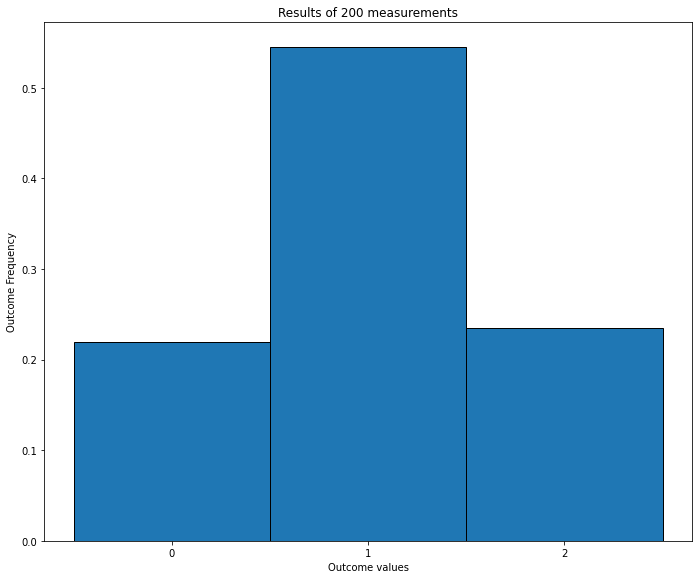

In [62]:
# Define density operator |+><+|
rho = plus@plus.T
# Set the value of r
r = 0.5
# n is the number of measurements that will be performed on the system
n = 200

# Define the list of measurement operators and add each operator to the list
M_list = []
M_list.append(np.sqrt(1-r)*(sig_plus@sig_minus))
M_list.append(sig_minus@sig_plus)
M_list.append(np.sqrt(r)*sig_minus)
    
# Store the results of n measurements
outcomes = measurements(rho, M_list, n)

# Plot the results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
bins = [-0.5, 0.5, 1.5, 2.5]
x_ticks = [0, 1, 2]
ax.hist(outcomes, bins=bins, density=True, ec='black')
ax.set_xticks(x_ticks)
ax.set_title(f'Results of {n} measurements')
ax.set_xlabel('Outcome values')
ax.set_ylabel('Outcome Frequency')
plt.show()


**We can see that here the measurement operator $K_0$ from part c) is now separated into two individual operators $K_0$ and $K_1$ in part d). It can be seeen from the results of part d), that this has the effect of distributing the probability of obtaining an outcome associated with $K_0$ from part c) over the two operators $K_0$ and $K_1$ form part d) (as these operators sum to $K_0$ from part c).**

8. (a) The partial trace over one qubit of a two-qubit system is defined by

$$ \hat{\rho}_A = {\rm tr}_B ( \hat{\rho}) = \sum_{j=0}^1 \langle b_j| \hat{\rho}|b_j\rangle = \sum_{j=0}^1 (\hat{\mathbb{1}}_A\otimes\langle b_j|) \hat{\rho}(\hat{\mathbb{1}}_A\otimes| b_j\rangle), $$

where $\{|b_j\rangle\}$ is any orthonormal basis in the Hilbert space of qubit $B$. Assume that $|b_{0}\rangle = |0\rangle$ and $|b_1\rangle = |1\rangle$ are the computational basis states. Construct the Kraus operators describing the above CPTP map. Verify numerically that the Kraus operators obey the completeness relation required for a CPTP map.

In [63]:
# Define the tow basis vectors of Hilbert space B
b0 = np.array([[1], [0]])
b1 = np.array([[0], [1]])

# Elevate the action of these basis states to Krauss opertaors
K_0 = np.kron(np.eye(2), b0.T)
K_1 = np.kron(np.eye(2), b1.T)

# Store and print the result of the completeness condition for K_0 and K_1 (which should be identity)
completeness = K_0.T.conjugate()@K_0 + K_1.T.conjugate()@K_1
print(completeness)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


(b) Now consider again the two-qubit problem described by the Hamiltonian

$$ \hat{H}  = -\frac{\hbar\omega_A}{2} \hat{\sigma}_z\otimes \hat{\mathbb{1}} -  \frac{\hbar\omega_B}{2} \hat{\mathbb{1}}\otimes \hat{\sigma}_z + \frac{\hbar J}{4} \left ( \hat{\sigma}_x \otimes \hat{\sigma}_x + \hat{\sigma}_y \otimes \hat{\sigma}_y \right  ) + \frac{\hbar V}{2}  \hat{\sigma}_z\otimes \hat{\sigma}_z,$$

which we saw in question 8 of Worksheet 1. Simulate the dynamics starting from the pure state $|\psi(0)\rangle = |10\rangle$. Use the parameters $\omega_A = \omega_B$ and $J=V = 0.5\omega_A$, and simulate up to a time $Jt = 20$. (You can either re-use your solution from Worksheet 1, or adapt the code from the solution provided.) Compute the reduced density matrix of qubit $A$ and plot its purity, $P = {\rm tr}(\hat{\rho}_A^2)$, as a function of time.

In [64]:
# Define a function to trace out the Hilbert space defined by the 
# Krauss operators in the list k_list from the density matrix rho
# Return the reduce density operator
def trace_b(rho, k_list):
    reduced_rho = 0
    for k in k_list:
        reduced_rho += k@rho@k.T
    return reduced_rho


# Define a function for iteratively carrying out unitary time evolution according to U_dt,
# and compute the purity of the reduced density matrix according to the Krauss 
# operators in the list k_list with initial density matrix matrix rho_0, total evolution 
# time t_tot, timestep dt
def time_evo(rho_0, U_dt, k_list, t_tot, dt):
    
 
    # Initialise variables
    n_steps = int(t_tot/dt)  # Number of timesteps to take
    rho, t = rho_0, 0.0           # Initial state and time
    time = np.arange(t, t_tot+dt, dt)
    purity_list = np.zeros(n_steps+1) # To store the purity at each time step

    
    # Loop over timesteps
    for i in range(n_steps):
        # Compute and store expectation values
        purity = np.trace(trace_b(rho, k_list)**2)
        purity_list[i] = np.real(purity)
        
        # Take a step forward in time
        rho = U_dt@rho@U_dt.T.conjugate()
    
    # Compute and store final expectation values
    purity = np.trace(rho**2)
    purity_list[n_steps] = np.real(purity)
    
    
    return time, purity_list

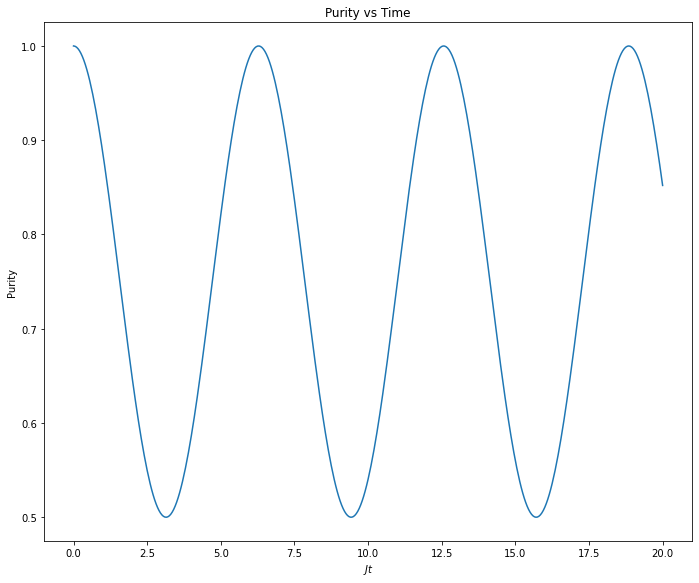

In [65]:
# Some constants of the system
w_a = w_b = 1
J = V = 0.5*w_a
iden = np.eye(2)

# Define the initial state |10>
phi_0 = np.kron(b1, b0)
rho_0 = phi_0@phi_0.T.conjugate()


# Define total time and time increment size
t_tot = 20
dt = 0.05

# Define the Hamiltonian and unitary operator which describes the evolution
H = -w_a/2*np.kron(PZ,iden) - w_b/2*np.kron(iden,PZ) + J/4*(np.kron(PX,PX) + np.kron(PY,PY)) + V/2*np.kron(PZ,PZ)
U_dt = expm(-1j*H*dt)

# Define the Krauss operators to reduce the system
k_list = [K_0, K_1]

# Perform the time evolution and store the results
time, purity = time_evo(rho_0, U_dt, k_list, t_tot, dt)

# Plot the results
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.plot(time, purity)
ax.set_xlabel('$Jt$')
ax.set_ylabel('Purity')
ax.set_title('Purity vs Time')
plt.show()

(c) Repeat the purity calculation of part (b) but with the parameters $\omega_A = 2\omega_B$ and $J=V=0.5\omega_A$. Comment on the differences between the results of (b) and (c).

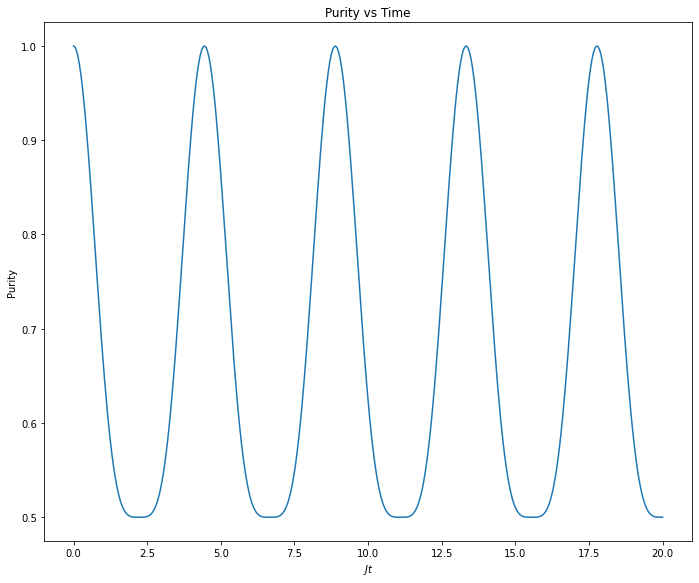

In [66]:
# New constants
w_b = 1
w_a = 2*w_b
J = V = 0.5*w_a
iden = np.eye(2)

# Define the initial state |10>
phi_0 = np.kron(b1, b0)
d_0 = phi_0@phi_0.T.conjugate()


# Define total time and time increment size
t_tot = 20
dt = 0.05

# Define the Hamiltonian and unitary operator which describes the evolution
H = -w_a/2*np.kron(PZ,iden) - w_b/2*np.kron(iden,PZ) + J/4*(np.kron(PX,PX) + np.kron(PY,PY)) + V/2*np.kron(PZ,PZ)
U_dt = expm(-1j*H*dt)

# Define the Krauss operators to reduce the system
ks = [K_0, K_1]


# Perform the time evolution and store the results
time, purity = time_evo(rho_0, U_dt, k_list, t_tot, dt)

# Plot the results
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.plot(time, purity)
ax.set_xlabel('$Jt$')
ax.set_ylabel('Purity')
ax.set_title('Purity vs Time')
plt.show()


* **The first difference that can be seen from the two resutls is that changing the parameters has the effect of increaing the frequency with which the state oscillates between that of a pure state and a maximally mixed state.**

* **It can also seen that for this set of parameters, the amount of time for which the state is pure on each oscillation is decresed from that in part c), whereas the amount of time for which the state is maximaly mixed on each oscillation is increased from that in part c).**
